In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

## Features Selection

In [122]:
df_raw = pd.read_csv('kredit.csv')

In [123]:
df = df_raw.copy(deep=True)

In [124]:
df['altersgruppe'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['alter'] > 18) & (col['alter'] <= 25), 'altersgruppe'] = 'Young Adults'
    col.loc[(col['alter'] > 25) & (col['alter'] <= 39), 'altersgruppe'] = 'Adults'
    col.loc[(col['alter'] > 39) & (col['alter'] <= 59), 'altersgruppe'] = 'Senior'
    col.loc[col['alter'] > 59, 'altersgruppe'] = 'Elder' 
    
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,Young Adults
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,Adults
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,Young Adults
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,Adults
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,Adults


In [125]:
df['zahlung pro monat'] = df['hoehe'] / df['laufzeit']

In [126]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


### One Hot Encoded

In [127]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [128]:
X = df.drop('kredit', axis=1)

In [129]:
y = df['kredit']

In [130]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [131]:
# One Hot Encoder before split

ohe = OneHotEncoder(sparse=False)
ohe.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [132]:
X_cat = ohe.transform(X_cat)

In [133]:
# scaling before train test split
X = np.hstack((X_cat, X_num))

In [134]:
X = np.hstack((X_cat, X_num))

In [135]:
ohe.get_feature_names()

array(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x1_0', 'x1_1', 'x1_2', 'x1_3',
       'x1_4', 'x2_0', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6',
       'x2_8', 'x2_9', 'x2_10', 'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5',
       'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x5_1', 'x5_2', 'x5_3',
       'x5_4', 'x6_1', 'x6_2', 'x6_3', 'x6_4', 'x7_1', 'x7_2', 'x7_3',
       'x8_1', 'x8_2', 'x8_3', 'x8_4', 'x9_1', 'x9_2', 'x9_3', 'x9_4',
       'x10_1', 'x10_2', 'x10_3', 'x11_1', 'x11_2', 'x11_3', 'x12_1',
       'x12_2', 'x12_3', 'x12_4', 'x13_1', 'x13_2', 'x13_3', 'x13_4',
       'x14_1', 'x14_2', 'x15_1', 'x15_2', 'x16_1', 'x16_2', 'x17_Adults',
       'x17_Elder', 'x17_Senior', 'x17_Young Adults'], dtype=object)

In [136]:
X.shape

(1000, 76)

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Scaled after splitting

In [139]:
scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])

### Chi Squared

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [141]:
best_features = SelectKBest(chi2, k=30)

In [142]:
best_features.fit(X_train[:, :-4], y_train)

SelectKBest(k=30, score_func=<function chi2 at 0x000001BE54A6C048>)

In [143]:
df_best_features = pd.DataFrame()

In [144]:
df_best_features['Features'] = np.hstack((ohe.get_feature_names(categorical_columns)))
df_best_features['Scores'] = best_features.scores_

In [145]:
df_best_features.sort_values(by='Scores', ascending=False).head(20)

,Features,Scores
3,laufkont_4,44.199148
0,laufkont_1,42.290959
5,moral_1,14.734694
8,moral_4,14.556391
23,sparkont_5,12.190476
4,moral_0,11.311987
19,sparkont_1,10.159122
22,sparkont_4,9.241758
67,gastarb_2,8.595238
47,verm_4,8.009524


In [146]:
X_train_cat = best_features.transform(X_train[:, :-4])

In [147]:
X_train_new = np.hstack((X_train_cat, X_train[:, -4:]))

In [148]:
X_train_new.shape

(800, 34)

In [149]:
X_test[:, -4:] = scaler.fit_transform(X_test[:, -4:])

In [150]:
X_test_cat = best_features.transform(X_test[:, :-4])

In [151]:
X_test_new = np.hstack((X_test_cat, X_test[:, -4:]))

In [152]:
X_test_new.shape

(200, 34)

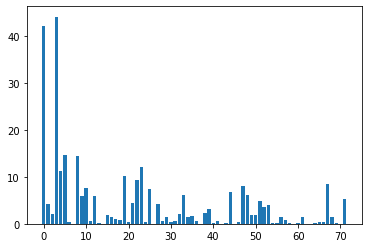

In [153]:
from matplotlib import pyplot

pyplot.bar([i for i in range(len(best_features.scores_))], best_features.scores_)
pyplot.show()

## Modeling

### Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
log_model_baseline = LogisticRegression()

In [156]:
log_model_baseline.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
log_model_baseline.coef_

array([[-0.76907488, -0.33675871,  0.37965929,  0.72664644, -0.66181724,
        -0.62805466,  0.57609754, -0.68837156,  0.7737875 ,  0.15553116,
        -0.49582166, -0.33457046,  0.34247581,  1.00223813,  0.63686774,
        -0.27148303,  0.6226024 , -0.49065183, -0.67815456, -0.38490221,
         0.67912432,  0.23786593, -0.1915335 , -0.37637785, -0.30150029,
        -0.40965891,  0.16148863,  0.24864241,  1.3167585 , -0.33084225,
        -0.40192893, -0.13655641,  0.04417227, -0.03897749]])

In [158]:
y_pred = log_model_baseline.predict(X_test_new)

In [159]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [160]:
y_pred_proba = log_model_baseline.predict_proba(X_test_new)

In [161]:
y_pred_proba

array([[0.74072155, 0.25927845],
       [0.0458666 , 0.9541334 ],
       [0.11486299, 0.88513701],
       [0.02091196, 0.97908804],
       [0.85400713, 0.14599287],
       [0.13971726, 0.86028274],
       [0.63500804, 0.36499196],
       [0.69740541, 0.30259459],
       [0.27842628, 0.72157372],
       [0.02204135, 0.97795865],
       [0.46515985, 0.53484015],
       [0.85183335, 0.14816665],
       [0.10942531, 0.89057469],
       [0.40444224, 0.59555776],
       [0.63166972, 0.36833028],
       [0.11527847, 0.88472153],
       [0.18411559, 0.81588441],
       [0.2967791 , 0.7032209 ],
       [0.07438709, 0.92561291],
       [0.20383684, 0.79616316],
       [0.10066251, 0.89933749],
       [0.04485226, 0.95514774],
       [0.66227367, 0.33772633],
       [0.56487872, 0.43512128],
       [0.07953448, 0.92046552],
       [0.09417718, 0.90582282],
       [0.01318891, 0.98681109],
       [0.59211525, 0.40788475],
       [0.1874924 , 0.8125076 ],
       [0.88283721, 0.11716279],
       [0.

In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [163]:
accuracy_score(y_test, y_pred)

0.8

In [164]:
confusion_matrix(y_test, y_pred)

array([[ 33,  27],
       [ 13, 127]], dtype=int64)

In [165]:
from sklearn.metrics import plot_confusion_matrix

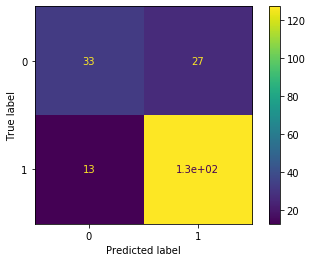

In [166]:
plot_confusion_matrix(log_model_baseline, X_test_new, y_test)